<a href="https://colab.research.google.com/github/daustin1/355-Team-1-GOL/blob/master/11_2Att1_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#References
#-------------------------------------------------------
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#https://www.kaggle.com/dansbecker/underfitting-and-overfitting
#https://towardsdatascience.com/precision-vs-recall-386cf9f89488
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
#https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
#https://www.kaggle.com/daustin1/step-by-step-diabetes-classification-knn-detailed/edit
#https://www.geeksforgeeks.org/best-python-libraries-for-machine-learning/
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#http://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/
#https://github.com/antaloaalonso/Classification-Model-YT-Video/blob/master/Classification%20Model%20on%20breast%20cancer%20Dataset.ipynb
#https://medium.com/@harshdeepsingh_35448/understanding-random-forests-aa0ccecdbbbb
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

#-------------------------------------------------------
#Title: RF 
#Author: David Austin
#Purpose: Thesis Work
#Created: Oct 7, 2019
#Revised: Nov 2,2019
#Advisor: Dr. Hong Liu
#-------------------------------------------------------

In [0]:
import numpy as np
import pandas as pd
from numpy import loadtxt

from numpy import array

import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import auc, roc_curve, confusion_matrix, accuracy_score,precision_recall_curve,f1_score


Read in file

In [74]:
#Read in csv, set up x and y variables
#-------------------------------------------------------
#Read in Data (CSV)
fi = pd.read_csv("/Untitled Folder/nonclean0627_unCondAllCA1S1.csv")
fi.head(6)


,type,sendTime,sender,messageID,pos_0,pos_1,spd_0,spd_1,receiver,AttackType,MLPrediction
0,3,25200.00936,85,2081,3594.664563,5665.135272,1.365599,-31.771078,7,0,0
1,3,25200.02011,91,2452,3597.065839,5626.300132,2.669000,-31.706486,7,0,0
2,3,25200.03066,931,3619,3589.664305,5703.861398,-1.355341,32.461479,7,0,0
3,3,25200.04402,961,4645,3631.304771,5229.921448,-4.466323,28.634010,7,0,0
4,3,25200.06986,313,7676,5560.000000,5820.000000,-0.019531,-33.487743,7,1,0
5,3,25200.24980,109,13575,3600.326908,5686.981738,1.289000,-30.043390,7,0,0


In [75]:
#Create copy of original data without extra columns
modFi = fi.drop(columns=['type','sendTime','messageID','MLPrediction','sender','receiver'])
clfi = (fi[fi.AttackType != 1])
atfi = (fi[fi.AttackType != 0])
#Setup x and y variables (Features vs target)
y=fi['AttackType']
#Drop un-necessary features from X
x=fi.drop(columns=['type','sendTime','messageID','AttackType','MLPrediction','sender','receiver'])
#Display first six values in x
x.head(6)

,pos_0,pos_1,spd_0,spd_1
0,3594.664563,5665.135272,1.365599,-31.771078
1,3597.065839,5626.300132,2.669000,-31.706486
2,3589.664305,5703.861398,-1.355341,32.461479
3,3631.304771,5229.921448,-4.466323,28.634010
4,5560.000000,5820.000000,-0.019531,-33.487743
5,3600.326908,5686.981738,1.289000,-30.043390


In [76]:
#Display first six values in y
y.head(6)

0    0
1    0
2    0
3    0
4    1
5    0
Name: AttackType, dtype: int64

0    453692
1     47142
Name: AttackType, dtype: int64

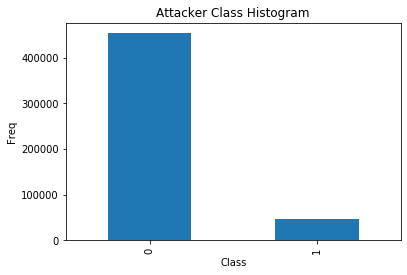

In [77]:
#Visualize the Amount of Score (1) vs (0)
#-------------------------------------------------------

pd.value_counts(fi['AttackType']).plot.bar()
plt.title('Attacker Class Histogram')
plt.xlabel('Class')
plt.ylabel('Freq')
fi['AttackType'].value_counts()

In [78]:
(47142/(453592+47142))*100

9.414579397444552

Split the data

In [0]:
#Import the correct method 
#-------------------------------------------------------
from sklearn.model_selection import train_test_split
#Split the data into test and training. Do a 70% training and 30% testing. Split values as are in dataset (stratify)
#-------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=42,stratify=y,shuffle=True)

In [80]:
#Visualize shape of training vs testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350583, 4) (150251, 4) (350583,) (150251,)


To Ensure Proper Training. Must only SMOTE on Training data


*Fit* Data using Random Forest (RF)

```
# This is formatted as code
```




In [81]:
rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#To Verify Test Data, must tranform with same scaling as training used
#-----------------------------------------------------------

y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [83]:
#Print Confusion Matrix of Data 
#-----------------------------------------------------------

print(confusion_matrix(y_test, y_pred))

[[136108      0]
 [     0  14143]]


In [84]:
#The classification report shows the precision, recall, f1 score and accuracy of the model and each output case
#-----------------------------------------------------------

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136108
           1       1.00      1.00      1.00     14143

    accuracy                           1.00    150251
   macro avg       1.00      1.00      1.00    150251
weighted avg       1.00      1.00      1.00    150251



Plot ROC

Testing data AUC:  1.0


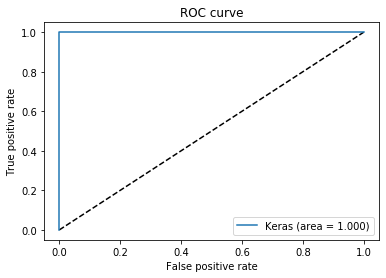

In [85]:
#Ref: 
#https://github.com/antaloaalonso/Classification-Model-YT-Video/blob/master/Classification%20Model%20on%20breast%20cancer%20Dataset.ipynb
#-----------------------------------------------------------
#ROC Curve
# AUC score of testing data
#-----------------------------------------------------------

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_prob)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.show()
plt.savefig("/Untitled Folder/11_2Att1RFROC.png")

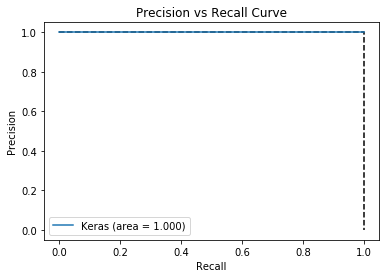

In [86]:
#Ref: 
#https://github.com/antaloaalonso/Classification-Model-YT-Video/blob/master/Classification%20Model%20on%20breast%20cancer%20Dataset.ipynb
#-----------------------------------------------------------
#Precision and Recall Curve
#-----------------------------------------------------------

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob,pos_label=1)

plt.figure(1)
plt.plot([0,1,1], [1,1,0], 'k--')
plt.plot(recall, precision, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall Curve')
plt.legend(loc='best')
#plt.show()
plt.savefig('/Untitled Folder/11_2Att1RF_PRRCurve.png')

In [87]:
print(np.unique(y_pred))

[0 1]


In [0]:
#Random Walk Data Generated Based on Distributions of Dataset. Testing of non / attackers

In [0]:
mynonattgen = (
[[5537.185451,5499.763465,4.294962976,4.961712227],
[5560.269413,5481.726369,23.08396196,-18.03709508],
[5566.87113,5450.496018,6.601717035,-31.23035156],
[5545.932152,5512.587134,-20.93897781,62.09111577],
[5554.571717,5522.563139,8.639565398,9.976005491],
[5554.477594,5484.553577,-0.0941235,-38.0095618],
[5514.101489,5517.80056,-40.37610504,33.24698227],
[5514.064062,5525.874518,-0.037426338,8.07395817],
[5545.932152,5486.939795,31.86808948,-38.93472238],
[5545.932152,5512.587134,0,25.64733825],
[5554.571717,5522.563139,8.639565398,9.976005491],
[5545.932152,5486.939795,-8.639565398,-35.62334374],
[5514.80296,5506.922893,-31.12919147,19.98309772],
[5519.893308,5514.973352,5.090347202,8.050458586],
[5552.686491,5479.935365,32.79318352,-35.03798659],
[5562.862626,5513.184385,10.17613464,33.24901974],
[5543.38148,5491.231088,-19.48114629,-21.95329721],
[5550.691369,5496.026203,7.309889865,4.79511487],
[5514.064062,5525.874518,-36.62730695,29.84831526],
[5539.01147,5519.60558,24.94740781,-6.268937916],
[5163.646037,5576.632969,10.7657507,2.152839272],
[5152.236896,5622.941917,-11.40914109,46.30894811],
[5175.055178,5530.324021,22.81828218,-92.61789622],
[5172.392738,5589.456638,-2.662439908,59.13261723],
[5186.729999,5594.670064,14.33726078,5.213425961],
[5184.763162,5594.771171,-1.966836945,0.101106955],
[5179.147077,5596.461068,-5.616084576,1.689897368],
[5189.323212,5563.212049,10.17613464,-33.24901974],
[5157.450008,5585.165346,-31.87320387,21.95329721],
[5147.899495,5605.544362,-9.55051335,20.37901631],
[5161.820018,5596.475084,13.92052263,-9.069277843],
[5169.842066,5585.165346,8.022048296,-11.30973847],
[5184.763162,5558.494767,14.92109623,-26.67057891],
[5186.028527,5569.47354,1.26536527,10.97877344],
[5141.00307,5586.072567,-45.02545744,16.5990262],
[5193.331716,5625.900416,52.32864615,39.82784905],
[5186.729999,5594.670064,-6.601717035,-31.23035156],
[5137.968862,5590.053889,-48.76113704,-4.61617475],
[5181.032304,5599.432644,43.06344166,9.37875428],
[5189.323212,5590.053889,8.290908493,-9.37875428]])

In [90]:
#Predict the output classes

nonAttPred = rf.predict(mynonattgen)
nonAttPred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [0]:
ynon = (
[[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0]]
)

In [92]:
print(confusion_matrix(ynon, nonAttPred))


[[40]]


In [0]:
#Random Walk Gen Data, All Attackers

myattgen = (
[
[5560,5849.761829,5.591604024,-4.817498439],
[5560,5856.226194,15.26770016,6.464364316],
[5560,5858.350164,2.094458262,2.123970556],
[5560,5826.952258,0.174107488,-31.39790642],
[5560,5887.555764,-5.238442488,60.60350574],
[5560,5820.246809,2.132500497,-67.30895421],
[5560,5845.0491,8.982450752,24.80229031],
[5560,5861.587801,5.65830739,16.5387017],
[5560,5792.923941,3.352828511,-68.66386064],
[5560,5842.35426,0.51157693,49.43031897],
[5544.050287,5820,3.058531343,-20.6133566],
[5575.059907,5820,31.00961983,2.72566848],
[5582.992562,5820,7.932654371,7.824998019],
[5596.807838,5820,13.81527643,-8.794052134],
[5561.546745,5820,-35.26109297,54.63051091],
[5535.826968,5820,-25.71977679,47.49808619],
[5556.933472,5820,21.10650394,7.395275093],
[5534.165459,5820,-22.76801277,6.545444849],
[5578.38028,5820,44.21482038,1.439112293],
[5622.709547,5820,44.32926727,2.064427141],
[5575.949713,5849.761829,-3.0984563,6.561352962],
[5575.059907,5783.773806,-0.889805445,-65.9880231],
[5582.992562,5781.649836,7.932654371,-2.123970556],
[5596.807838,5813.047742,13.81527643,31.39790642],
[5561.546745,5887.555764,-35.26109297,74.50802142],
[5584.173032,5819.753191,22.62628675,-67.80257296],
[5556.933472,5845.0491,-27.2395596,25.29590906],
[5585.834541,5861.587801,28.90106844,16.5387017],
[5578.38028,5792.923941,-7.454260837,-68.66386064],
[5622.709547,5797.64574,44.32926727,4.721799534]]


)

In [94]:
#Predict the output classes

attPred = rf.predict(myattgen)
attPred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [0]:
yatt = (
[
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1]]
)

In [96]:
print(confusion_matrix(yatt, attPred))


[[ 0  0]
 [26  4]]


In [0]:
#Mix of Attackers and Non Attackers. Based on dataset using combined attackers / non-attackers
mixAttNonAttGen=(
[[5355.311714,5810.34339,14.23748644,1.013111112],
[5357.362426,5773.956852,2.050711873,-36.38653811],
[5358.864778,5835.724636,1.502352095,61.76778389],
[5371.841819,5786.98286,12.97704033,-48.74177586],
[5373.151197,5811.480622,1.309378745,24.4977617],
[5351.652177,5820.085854,-21.49902047,8.605232388],
[5386.268622,5780.074169,34.61644555,-40.01168462],
[5378.366713,5836.902628,-7.901909753,56.82845808],
[5369.65981,5805.236449,-8.706902925,-31.66617864],
[5388.003787,5852.103909,18.34397701,46.86746035],
[5354.195299,5815.147047,-33.80848764,-36.95686238],
[3914.31501,5779.433525,-7.541675222,39.95430724],
[6093.896217,5457.454514,2179.581207,-321.9790105],
[6083.017688,5536.528128,-10.87852898,79.07361377],
[6066.205889,5501.464598,-16.81179906,-35.06353015],
[6069.033314,5546.035006,2.827424993,44.57040776],
[6056.525486,5543.826959,-12.50782846,-2.208046431],
[6070.983327,5514.660943,14.45784131,-29.16601657],
[6062.472926,5537.812505,-8.510400622,23.15156204],
[6039.065847,5524.370966,-23.40707882,-13.4415386],
[6014.577256,5549.560992,-24.48859153,25.19002565],
[6080.298871,5523.023387,65.72161525,-26.53760444],
[3330.788142,5463.444815,-12.2259476,-13.85512134],
[5291.725599,5758.742434,1960.937457,295.297619],
[5351.694125,5679.66882,59.96852521,-79.07361377],
[5334.882326,5714.73235,-16.81179906,35.06353015],
[5337.709751,5737.905384,2.827424993,23.17303373],
[5329.096331,5672.369989,-8.613419646,-65.53539506],
[5314.63849,5706.531321,-14.45784131,34.16133206],
[5331.149363,5729.682883,16.51087319,23.15156204],
[5307.742284,5716.241345,-23.40707882,-13.4415386],
[5371.044561,5741.43137,63.30227661,25.19002565],
[5305.322945,5714.893766,-65.72161525,-26.53760444]]

)

In [98]:
#Predict the output classes


mixPred = rf.predict(mixAttNonAttGen)
mixPred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)